# Набор данных прогноза инсульта
## Описание задачи и информация о датасете
По данным Всемирной организации здравоохранения (ВОЗ) инсульт является второй ведущей причиной смерти в мире, на него приходится примерно 11% от общего числа смертей.

Источник данных: https://www.kaggle.com/fedesoriano/stroke-prediction-dataset


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

## Загрузка и прочтение данных

In [2]:
url = 'https://raw.githubusercontent.com/sashatyurmina/machinelearning/main/healthcare-dataset-stroke-data.csv'
data = pd.read_csv(url)

In [3]:
data.shape

(5110, 12)

In [4]:
data

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


Имена столбцов - признаков:

In [5]:
data.columns = ['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married', 'work_type', 'Residence_type', 'avg_glucose_level', 'bmi', 'smoking_status', 'stroke']

+ id - идентификатор
+ gender - пол: мужской, женский, другой
+ age - возраст
+ hypertension - гипертония: 0, если у пациента нет гипертонии, 1, если у пациента гипертония
+ heart_disease - сердченые заболевания: 0, если у пациента нет никаких сердечных заболеваний, 1, если у пациента есть заболевание сердца
+ ever_married - когда-либо был женат: Нет или Да
+ work_type - тип работы: дети, государственная работа, Никогда не работавший, Частный или Самозанятый
+ Residence_type - Тип местожительства: Сельский или Городской
+ avg_glucose_level - средний уровень глюкозы в крови
+ bmi - индекс массы тела
+ smoking_status - статус курения: ранее курил, никогда не курил, курит или Неизвестно*
+ stroke - инсульт: 1, если у пациента был инсульт, или 0, если нет
* Примечание: "Неизвестно" в smoking_status означает, что информация недоступна для этого пациента

Требуется предсказать бинарный категориальный признак stroke по остальным признакам

## Визуализация данных и описательная статистика

In [6]:
data.dtypes

id                     int64
gender                object
age                  float64
hypertension           int64
heart_disease          int64
ever_married          object
work_type             object
Residence_type        object
avg_glucose_level    float64
bmi                  float64
smoking_status        object
stroke                 int64
dtype: object

In [7]:
data.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


Для количественных признаков приведены количества значений, средние значения, стандартное отклонение, минимальное и макимальное значения, медиана и значения квартилей:

In [8]:
data.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


Для признаков типа object приведены количество значений, количество уникальных значений, самое распространенные значение и частота наиболее распространенного значения:

In [9]:
data.describe(include = ['object'])

,gender,ever_married,work_type,Residence_type,smoking_status
count,5110,5110,5110,5110,5110
unique,3,2,5,2,4
top,Female,Yes,Private,Urban,never smoked
freq,2994,3353,2925,2596,1892


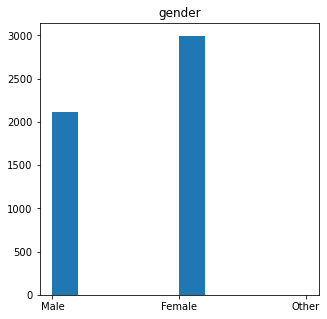

In [10]:
fig = plt.figure(figsize = (5, 5))
plt.hist(data.loc[:, "gender"])
plt.title('gender')
plt.show()

Инсульт чаще проявляется у женщин.

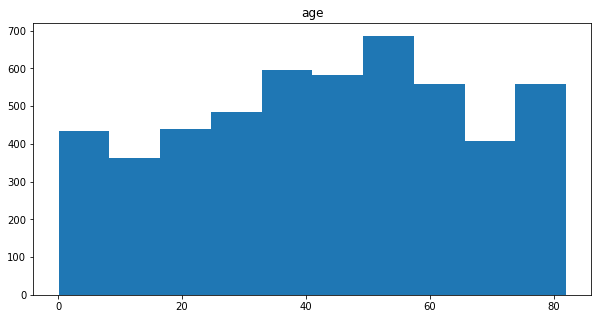

In [11]:
fig = plt.figure(figsize = (10, 5))
plt.hist(data.loc[:, "age"])
plt.title('age')
plt.show()

Самая большая вероятность получить инсульт в возрасте от 30-65 лет и от 75-80 лет.

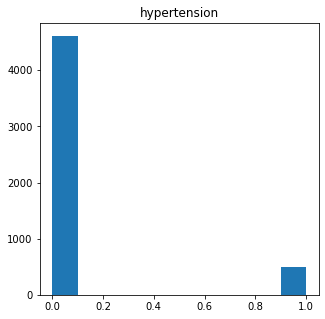

In [12]:
fig = plt.figure(figsize = (5, 5))
plt.hist(data.loc[:, "hypertension"])
plt.title('hypertension')
plt.show()

В основном, гипертонии нет.

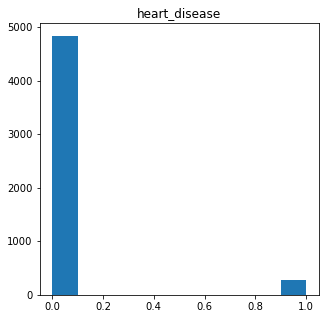

In [13]:
fig = plt.figure(figsize = (5, 5))
plt.hist(data.loc[:, "heart_disease"])
plt.title('heart_disease')
plt.show()

Так же почти нет сердечных заболеваний.

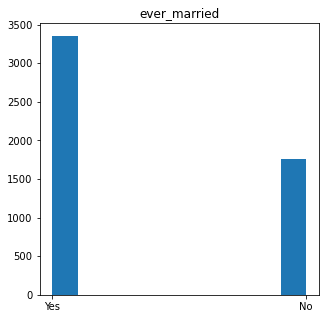

In [14]:
fig = plt.figure(figsize = (5, 5))
plt.hist(data.loc[:, "ever_married"])
plt.title('ever_married')
plt.show()

Большинство женаты/замужем.

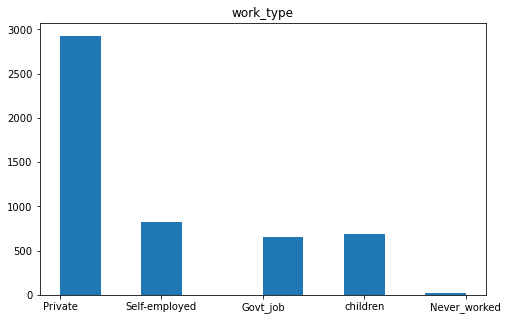

In [15]:
fig = plt.figure(figsize = (8, 5))
plt.hist(data.loc[:, "work_type"])
plt.title('work_type')
plt.show()

Инсульт у людей, что заняты частной работой.

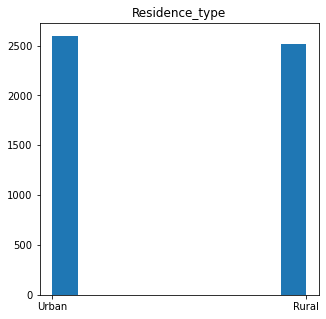

In [16]:
fig = plt.figure(figsize = (5, 5))
plt.hist(data.loc[:, "Residence_type"])
plt.title('Residence_type')
plt.show()

Этот параметр не сильно влияет на получение инсульта (но чуть больше у городских жителей).

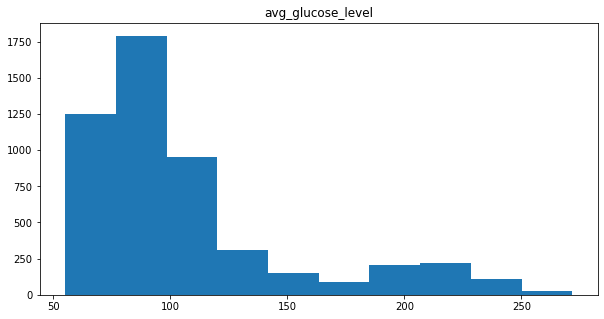

In [17]:
fig = plt.figure(figsize = (10, 5))
plt.hist(data.loc[:, "avg_glucose_level"])
plt.title('avg_glucose_level')
plt.show()

В основном, у людей с низким уровнем глюкозы в крови.

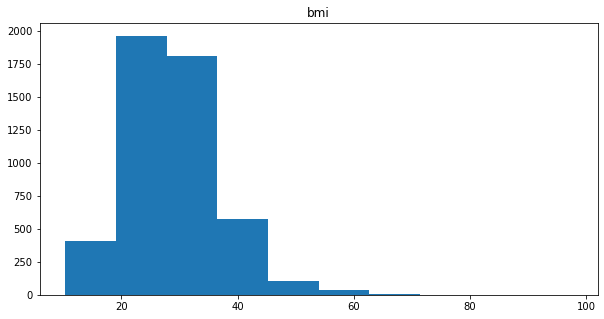

In [18]:
fig = plt.figure(figsize = (10, 5))
plt.hist(data.loc[:, "bmi"])
plt.title('bmi')
plt.show()

Проявляется у людей с малой массой индекса тела.

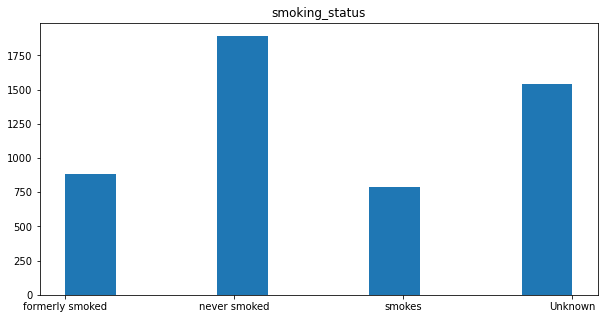

In [19]:
fig = plt.figure(figsize = (10, 5))
plt.hist(data.loc[:, "smoking_status"])
plt.title('smoking_status')
plt.show()

Инсульт проявляется чаще у некурящих людей.

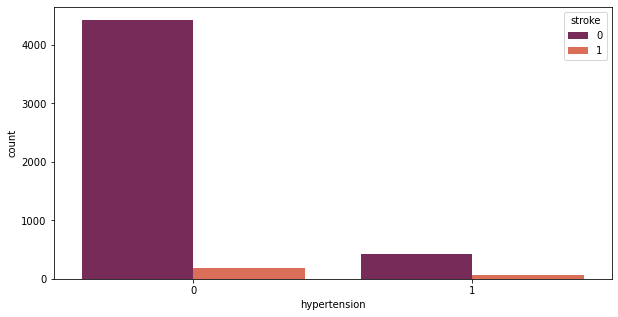

In [20]:
plt.figure(figsize=(10,5))
sns.countplot(x='hypertension', hue= 'stroke', data=data, palette='rocket')
pass

Зависимость гипертонии от инсульта.

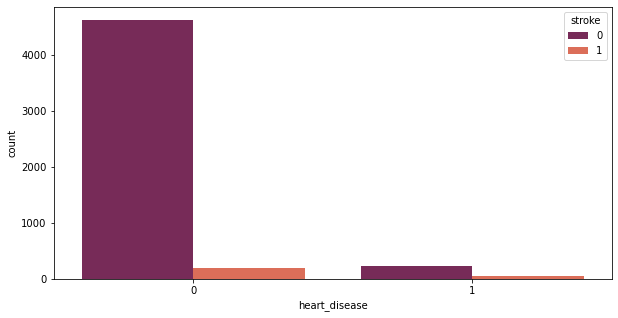

In [21]:
plt.figure(figsize=(10,5))
sns.countplot(x='heart_disease', hue= 'stroke', data=data, palette='rocket')
pass

Зависимость болезней сердца от инсульта.

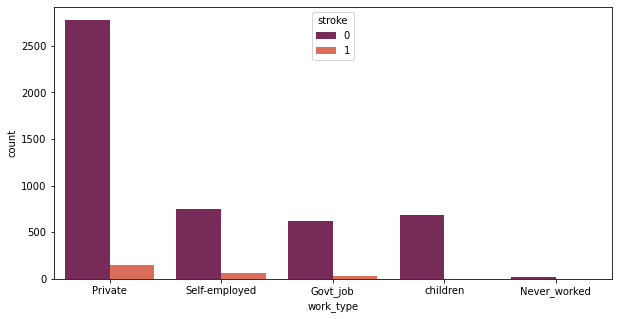

In [22]:
plt.figure(figsize=(10,5))
sns.countplot(x='work_type', hue= 'stroke', data=data, palette='rocket')
pass

Зависимость наличия работы от инсульта.

Это лишь некоторые примеры, как тот или иной признак влияет на инсульт.
Далее посмотрим на ящик с усами:

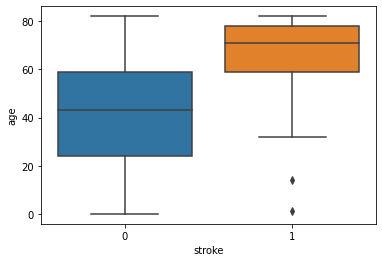

In [23]:
sns.boxplot(x=data["stroke"], y=data["age"]);
plt.show()

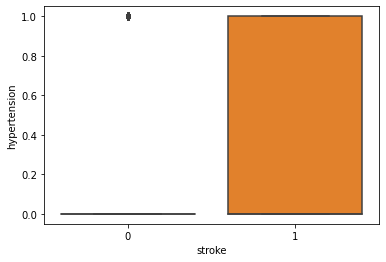

In [24]:
sns.boxplot(x=data["stroke"], y=data["hypertension"]);
plt.show()

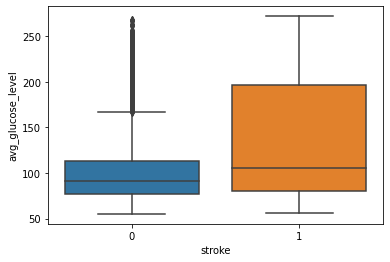

In [25]:
sns.boxplot(x=data["stroke"], y=data["avg_glucose_level"]);
plt.show()

Скрипичный график:

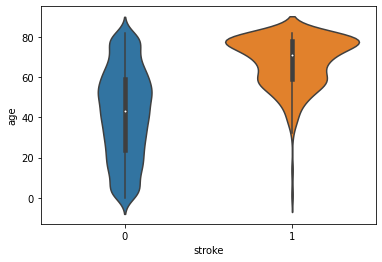

In [26]:
sns.violinplot(x=data["stroke"], y=data["age"])
pass

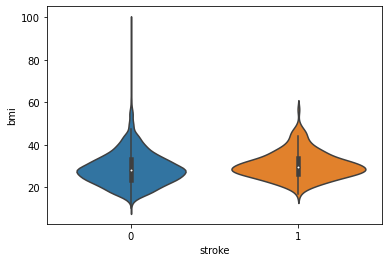

In [27]:
sns.violinplot(x=data["stroke"], y=data["bmi"])
pass

Корреляционная матрица по числовым признакам:

In [28]:
corr_mat = data.corr()
corr_mat

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
id,1.000000,0.003538,0.003550,-0.001296,0.001092,0.003084,0.006388
age,0.003538,1.000000,0.276398,0.263796,0.238171,0.333398,0.245257
hypertension,0.003550,0.276398,1.000000,0.108306,0.174474,0.167811,0.127904
heart_disease,-0.001296,0.263796,0.108306,1.000000,0.161857,0.041357,0.134914
avg_glucose_level,0.001092,0.238171,0.174474,0.161857,1.000000,0.175502,0.131945
bmi,0.003084,0.333398,0.167811,0.041357,0.175502,1.000000,0.042374
stroke,0.006388,0.245257,0.127904,0.134914,0.131945,0.042374,1.000000


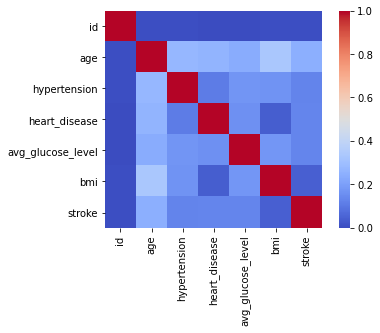

In [29]:
sns.heatmap(corr_mat, square=True, cmap='coolwarm')
pass

Видно, что почти каждый признак не зависит друг от друга. Чем светлее ячейка, тем больше по абсолютной величине коэффициент корреляции.

## Обработка пропущенных значений

Только в индексе массы тела есть пропущенные значения:

In [30]:
data.fillna(data.median(axis = 0), axis=0 , inplace=True)

In [31]:
data.isna().sum()


id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [32]:
data.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.1,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


## Векторизация

Такие признаки, как gender','work_type', 'smoking_status' имеют несколько варинатов - небинарные. Признаки 'ever_married', 'Residence_type' имеют только два - бинарные:

In [33]:
object_columns = [c for c in data.columns if data[c].dtype.name == 'object']
numerical_columns   = [c for c in data.columns if data[c].dtype.name != 'object']
print('object_columns=', object_columns)
print('numerical_columns=', numerical_columns)

object_columns= ['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']
numerical_columns= ['id', 'age', 'hypertension', 'heart_disease', 'avg_glucose_level', 'bmi', 'stroke']


In [34]:
data_describe = data.describe(include=['object'])
binary_columns    = [c for c in object_columns if data_describe[c]['unique'] == 2]
nonbinary_columns = [c for c in object_columns if data_describe[c]['unique'] > 2]
print('binary_columns=', binary_columns)
print('nonbinary_columns=', nonbinary_columns)

binary_columns= ['ever_married', 'Residence_type']
nonbinary_columns= ['gender', 'work_type', 'smoking_status']


Такие признаки как gender, work_type и smoking_status принимают разные значения. Можно их заменить на более удобные, например:
gender [Female, Male, Other] как gender_Female,	gender_Male, gender_Other. С остальными так же:

In [35]:
data_object = pd.get_dummies(data[nonbinary_columns])
print(data_object.columns)

Index(['gender_Female', 'gender_Male', 'gender_Other', 'work_type_Govt_job',
       'work_type_Never_worked', 'work_type_Private',
       'work_type_Self-employed', 'work_type_children',
       'smoking_status_Unknown', 'smoking_status_formerly smoked',
       'smoking_status_never smoked', 'smoking_status_smokes'],
      dtype='object')


In [36]:
data_object.head()

,gender_Female,gender_Male,gender_Other,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,0,1,0,0,0,1,0,0,0,1,0,0
1,1,0,0,0,0,0,1,0,0,0,1,0
2,0,1,0,0,0,1,0,0,0,0,1,0
3,1,0,0,0,0,1,0,0,0,0,0,1
4,1,0,0,0,0,0,1,0,0,0,1,0


## Нормализация

Каждый количественный признак приведем к нулевому среднему и единичному среднеквадратичному отклонению. Не будем нормализовать признак stroke:

In [37]:
numerical_columns_exept_is_stroke = ['id', 'age', 'hypertension', 'heart_disease', 'avg_glucose_level', 'bmi']


In [38]:
data_numerical_exept_is_stroke = data[numerical_columns_exept_is_stroke]
data_numerical_exept_is_stroke.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.862035
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.699562
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.800000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,32.800000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000


In [39]:
data_numerical_exept_is_stroke = (data_numerical_exept_is_stroke - data_numerical_exept_is_stroke.mean(axis = 0))/data_numerical_exept_is_stroke.std(axis = 0)

In [40]:
data_numerical_exept_is_stroke.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi
count,5.110000e+03,5.110000e+03,5.110000e+03,5.110000e+03,5.110000e+03,5.110000e+03
mean,-1.278277e-16,-7.276211e-16,3.834984e-15,3.465047e-16,3.674925e-15,-9.830601e-15
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-1.722489e+00,-1.908074e+00,-3.285697e-01,-2.389234e-01,-1.126848e+00,-2.410791e+00
25%,-8.872898e-01,-8.060363e-01,-3.285697e-01,-2.389234e-01,-6.382598e-01,-6.574445e-01
50%,1.957169e-02,7.842450e-02,-3.285697e-01,-2.389234e-01,-3.149637e-01,-9.897124e-02
75%,8.583503e-01,7.859932e-01,-3.285697e-01,-2.389234e-01,1.753909e-01,5.114531e-01
max,1.721135e+00,1.714677e+00,3.042899e+00,4.184622e+00,3.656787e+00,8.927516e+00


Соединим в оду таблицу:

In [41]:
data = pd.concat((data['stroke'], data_numerical_exept_is_stroke, data_object), axis = 1)
print(data.shape)

(5110, 19)


In [42]:
data.describe()

,stroke,id,age,hypertension,heart_disease,avg_glucose_level,bmi,gender_Female,gender_Male,gender_Other,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
count,5110.000000,5.110000e+03,5.110000e+03,5.110000e+03,5.110000e+03,5.110000e+03,5.110000e+03,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000
mean,0.048728,-1.278277e-16,-7.276211e-16,3.834984e-15,3.465047e-16,3.674925e-15,-9.830601e-15,0.585910,0.413894,0.000196,0.128571,0.004305,0.572407,0.160274,0.134442,0.302153,0.173190,0.370254,0.154403
std,0.215320,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.492612,0.492578,0.013989,0.334758,0.065480,0.494778,0.366896,0.341160,0.459236,0.378448,0.482920,0.361370
min,0.000000,-1.722489e+00,-1.908074e+00,-3.285697e-01,-2.389234e-01,-1.126848e+00,-2.410791e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,-8.872898e-01,-8.060363e-01,-3.285697e-01,-2.389234e-01,-6.382598e-01,-6.574445e-01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,1.957169e-02,7.842450e-02,-3.285697e-01,-2.389234e-01,-3.149637e-01,-9.897124e-02,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,8.583503e-01,7.859932e-01,-3.285697e-01,-2.389234e-01,1.753909e-01,5.114531e-01,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000
max,1.000000,1.721135e+00,1.714677e+00,3.042899e+00,4.184622e+00,3.656787e+00,8.927516e+00,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## Разбиение данных на обучающуюю и тестовую выборки

Для классификации по признаку stroke, будем использовать все входные признаки.

In [43]:
data

,stroke,id,age,hypertension,heart_disease,avg_glucose_level,bmi,gender_Female,gender_Male,gender_Other,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,1,-1.298185,1.051331,-0.328570,4.184622,2.706111,1.004988,0,1,0,0,0,1,0,0,0,1,0,0
1,1,0.716301,0.785993,-0.328570,-0.238923,2.121351,-0.098971,1,0,0,0,0,0,1,0,0,0,1,0
2,1,-0.255453,1.626231,-0.328570,4.184622,-0.005028,0.472490,0,1,0,0,0,1,0,0,0,0,1,0
3,1,1.118254,0.255317,-0.328570,-0.238923,1.437217,0.719257,1,0,0,0,0,1,0,0,0,0,0,1
4,1,-1.646975,1.582008,3.042899,-0.238923,1.501038,-0.631469,1,0,0,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5105,0,-0.864005,1.626231,3.042899,-0.238923,-0.494609,-0.098971,1,0,0,0,0,1,0,0,0,0,1,0
5106,0,0.394825,1.670454,-0.328570,-0.238923,0.420734,1.446571,1,0,0,0,0,0,1,0,0,0,1,0
5107,0,-0.793642,-0.363806,-0.328570,-0.238923,-0.511393,0.225723,1,0,0,0,0,0,1,0,0,0,1,0
5108,0,0.048492,0.343763,-0.328570,-0.238923,1.328127,-0.423665,0,1,0,0,0,1,0,0,0,1,0,0


In [44]:
x = data.drop('stroke', axis = 1) # выбрасываем столбец 'stroke'
y = data['stroke']
feature_names = x.columns

In [45]:
type(feature_names)

pandas.core.indexes.base.Index

In [46]:
x = x.to_numpy()

In [47]:
y = y.to_numpy()

In [48]:
print(x.shape)
print(y.shape)
N, d = x.shape

(5110, 18)
(5110,)


Разобьем данные на обучающую и тестовую выборки в пропорции 3:1 (75% - обучающая выборка, 25% - тестовая):

In [49]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 42)

N_train, _ = X_train.shape 
N_test,  _ = X_test.shape 

print(N_train, N_test)

3832 1278


## kNN

In [50]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 10)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=10)

In [51]:
y_test_predict = knn.predict(X_test)
err_test  = np.mean(y_test  != y_test_predict)

In [52]:
err_test

0.06259780907668232

Подбор параметров для уменьшения ошибки:

In [53]:
from sklearn.model_selection import GridSearchCV
nnb = [1, 3, 5, 10, 15]
knn = KNeighborsClassifier()
grid = GridSearchCV(knn, param_grid = {'n_neighbors': nnb}, cv=10)
grid.fit(X_train, y_train)

best_cv_err = 1 - grid.best_score_
best_n_neighbors = grid.best_estimator_.n_neighbors
print(best_cv_err, best_n_neighbors)

0.0443626251087903 10


## Вычисление ошибки на обучающей и тестовой выборках

In [54]:
knn = KNeighborsClassifier(n_neighbors = best_n_neighbors).fit(X_train, y_train)

err_train = np.mean(y_train != knn.predict(X_train))
err_test  = np.mean(y_test  != knn.predict(X_test))

print(err_train, err_test)

0.04384133611691023 0.06259780907668232


Вывод: 
Метод k ближайших соседей отлично справился со своей задачей, так как процент правильно предсказанных значений составляет выще 95% на обучающей и тестовой выборках. По результатам вычислений можно видеть, что при 10 ближайщих соседях метод дает более лучший результат, а именно ошибка на тестовой выборке = 0.06259780907668232, а ошибка на обучающей выборке = 0.04384133611691023

## Метод Random Forest

In [55]:
from sklearn import ensemble
rf = ensemble.RandomForestClassifier(n_estimators = 1000)
rf.fit(X_train, y_train)

err_train = np.mean(y_train != rf.predict(X_train))
err_test  = np.mean(y_test  != rf.predict(X_test))

print(err_train, err_test)

0.0 0.06259780907668232


Вывод:
По результатам видно, что метод Random Forest дает более высокую точность на обучающей выборке, а на тестовой дает точно такую же, сравненивая с методом ближайших соседей, в данном случае для задачи классификации лучше использовать его.    

## Общие выводы 

В результате проделанной работы была решена задача классификации с помощью метода К-ближайших соседей и метода Random Forest, а также была выполнена визуализация и вычисление основных характеристик, обработка пропущенных значений, обработка категориальных признаков, нормализация признаков, разбиение данных на тестовую и обучающую выборки. На основе проделанной работы можно сделать вывод о том, что использовании некоторых признаков, влияющих на наличие инсульта может при необходимости предсказать его прогнозы. А так же при таком наборе признаков задача классификации по состоянию бронирования решается с хорошей точностью методами kNN и Random Forest.